# Analiza Sentiment leksikona -Transformer



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a4.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,Lemme,Vrsta,Definicija,POS,NEG,OBJ
0,ENG30-03574555-n,ustanova,n,zgrada u koji se nalaziti organizacioni jedini...,0.000050,0.000092,0.999858
1,ENG30-07810907-n,začin,n,pripremljen dodatak jela za poboljšanje ukus,0.000127,0.000093,0.999780
2,ENG30-00721431-n,mesto,n,"u nečiji prilika , mogućnost",0.000055,0.003277,0.996668
3,ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,ostati jesam još samo da se doterati neki fine...,0.000069,0.000199,0.999731
4,ENG30-00903385-v,oprostiti,v,zapad on jesam oprostiti što se nekada računat...,0.000088,0.000142,0.999770
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,mandat,n,mandat predsednik,0.000364,0.000651,0.998985
25316,ENG30-15266685-n,sredina,n,vreme između početak i kraj vremenski perioda,0.000045,0.000093,0.999861
25317,ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,tačka u vreme kada se nešto završavati,0.000049,0.000119,0.999832
25318,ENG30-15276642-n,"b/s,bitova u sekundi",n,( računarstvo ) brzina prenos podatak ( npr . ...,0.000048,0.000096,0.999856


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema polaritetu 

In [7]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)     201    0.793839
 [0.125, 0.25)    114    0.450237
 [0.25, 0.375)    344    1.358610
 [0.375, 0.5)     296    1.169036
 [0.5, 0.625)     499    1.970774
 [0.625, 0.75)    433    1.710111
 [0.75, 0.875)    965    3.811216
 [0.875, 1.0)   22468   88.736177,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   23705   93.621643
 [0.125, 0.25)    787    3.108215
 [0.25, 0.375)    235    0.928120
 [0.375, 0.5)     252    0.995261
 [0.5, 0.625)      90    0.355450
 [0.625, 0.75)    136    0.537125
 [0.75, 0.875)     41    0.161927
 [0.875, 1.0)      74    0.292259,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23898   94.383886
 [0.125, 0.25)    493    1.947077
 [0.25, 0.375)    277    1.093997
 [0.375, 0.5)     232    0.916272
 [0.5, 0.625)     100    0.394945
 [0.625, 0.75)    171    0.675355
 [0.75, 0.875)     31    

In [8]:
pd.set_option('display.max_colwidth', None)

In [9]:
sent_an[sent_an["POS"]>.9][["Lemme","Definicija", "POS"]]

,Lemme,Definicija,POS
845,"moralnost,pravičnost",briga o razlikovanje dobar i zao ili pravedan i nepravedan ; dobar ili pravedan ponašanje,0.921821
929,"slaviti,veličati,glorifikovati,uzdizati",""" slaviti vrlina svoj deca """,0.929746
1018,voleti,gajiti nežan osećanje prema neki .,0.907537
1053,"blaženstvo,sedmo nebo,deveto nebo",stanje izuzetan sreća .,0.930773
2677,"razbludnost,pohota",jak seksualan nagon .,0.926316
2725,srećan,"onaj koji uživati ili pokazivati radost , zadovoljstvo ili srešu .",0.932032
2778,karakter,inherentan kompleks atribut koji određivati moralan i etički akcija i reakcija osoba .,0.930013
3155,"procvasti,procvetati,napredovati,prosperirati",Jačati u snaga .,0.907609
5239,važan,od velik značaj ili važnost .,0.907915
5271,vrlina,neki ceniti atribut ili kvalitet .,0.918457


In [36]:
sent_an[sent_an["POS"]>.9][["ID","Lemme","Definicija", "POS"]].to_clipboard()

In [10]:
(sent_an["POS"]>.9).sum()

55

Raspored reči prema negativnom polaritetu 

In [11]:
sent_an[sent_an["NEG"]>.9][["Lemme", "Definicija", "NEG"]]

,Lemme,Definicija,NEG
30,"smrskati,skršiti",Uništiti ili oštetiti na nasilan način .,0.958809
37,"oplakati,tugovati,jadikovati,ožaliti",Osećati tuga .,0.966797
141,"nedaća,beda",uzrok velik patnja i nesreća .,0.952598
540,"udarac,udar,šok",neprijatan ili razočaravajući iznenađenje,0.960122
803,"probosti,žigati",uzrokovati probadanje,0.958469
899,zaraditi,priskrbiti sopstven napor,0.937852
985,"biti neugodan,biti uvredljiv,biti neprijatan",izazvati nezadovoljstvo .,0.905841
1447,"opustiti,relaksirati",Ućiniti da se neki osetiti opušten .,0.963599
1981,"održati se,stajati",ne kvariti se niti truliti .,0.922739
2496,"jad,tugovanje",stanje u koji jesam neki tužan .,0.944008


In [35]:
sent_an[sent_an["NEG"]>.9][["ID","Lemme", "Definicija", "NEG"]].to_clipboard()

In [12]:
(sent_an["NEG"]>.9).sum()

106

Raspored reči prema objektivnosti 

In [13]:
sent_an["OBJ"].value_counts()

OBJ
0.814027    18
0.590705    10
0.809865     9
0.958157     8
0.999793     8
0.829215     7
0.958238     6
0.804551     6
0.999860     5
0.999868     5
0.999868     5
0.958238     4
0.999854     4
0.796398     4
0.814027     4
0.804551     4
0.958238     4
0.999868     4
0.999868     4
0.819712     4
0.796591     3
0.794509     3
0.600793     3
0.796294     3
0.999864     3
0.804551     3
0.788756     3
0.999866     3
0.829215     3
0.796591     3
0.999860     3
0.999860     3
0.858774     3
0.796591     3
0.999841     2
0.999355     2
0.999819     2
0.999860     2
0.627695     2
0.991372     2
0.435819     2
0.817352     2
0.999802     2
0.999867     2
0.804551     2
0.999860     2
0.999870     2
0.999870     2
0.999868     2
0.853936     2
0.999847     2
0.999865     2
0.796591     2
0.804551     2
0.999859     2
0.829215     2
0.999860     2
0.812473     2
0.999864     2
0.829215     2
0.717136     2
0.782497     2
0.998222     2
0.999846     2
0.999730     2
0.698360     2
0.9998

In [14]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

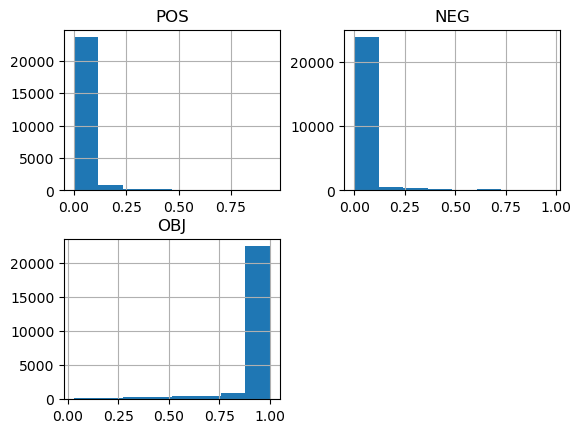

In [15]:
sent_an.hist(bins=8)

<Axes: >

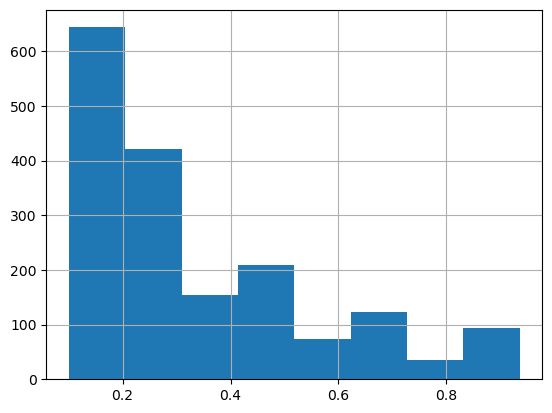

In [16]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

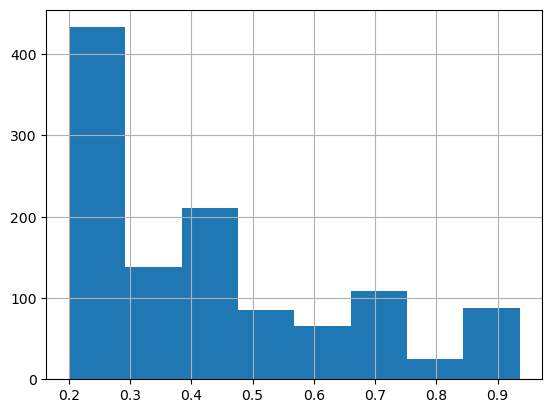

In [17]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

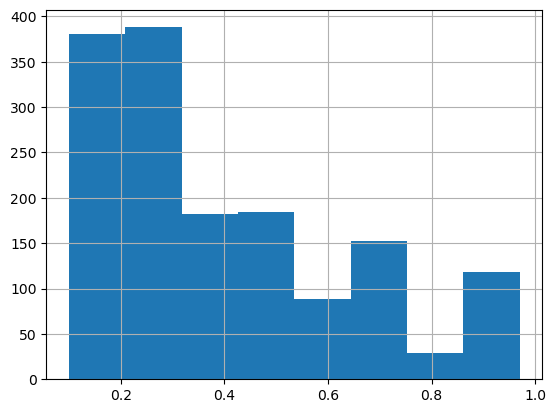

In [18]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

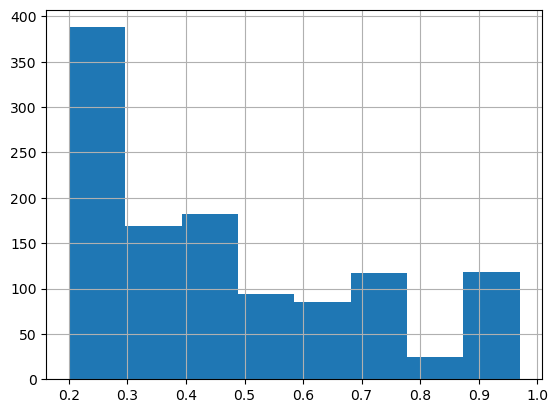

In [19]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [20]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

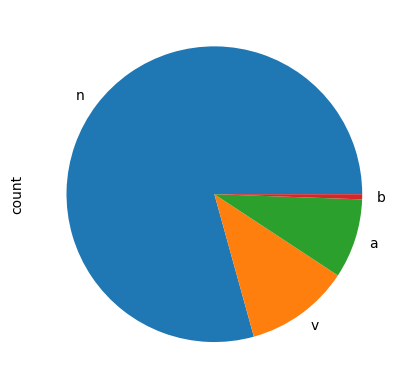

In [21]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

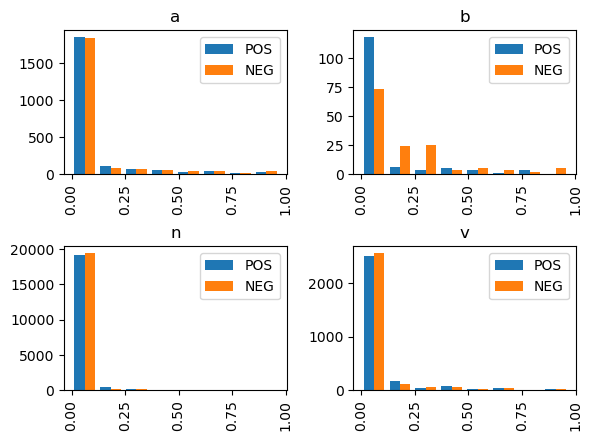

In [22]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

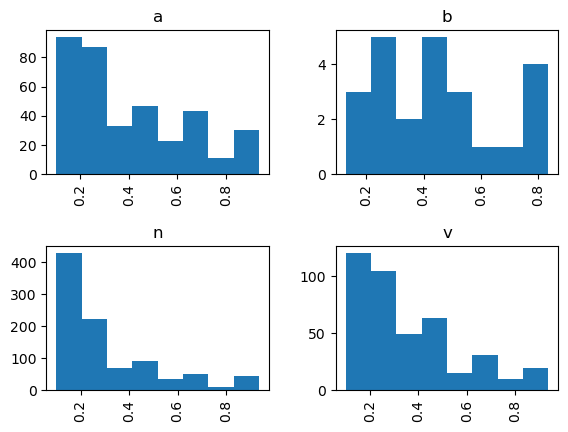

In [23]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

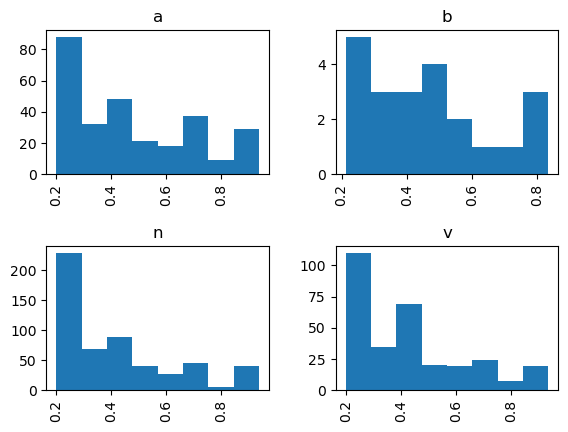

In [24]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

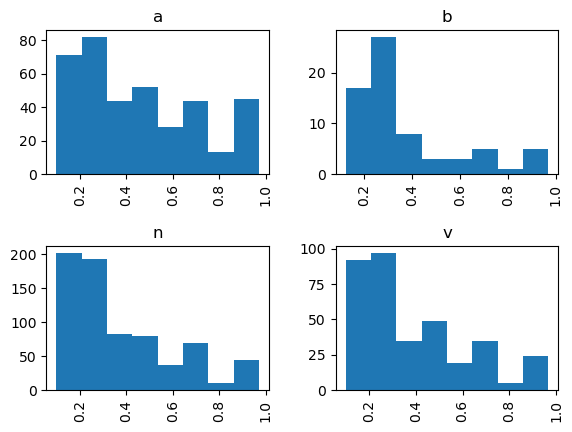

In [25]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

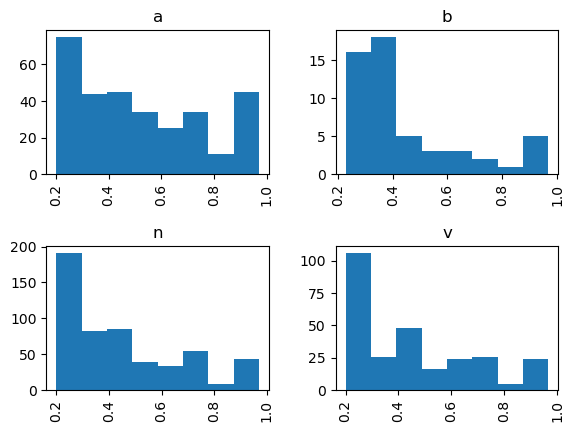

In [26]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

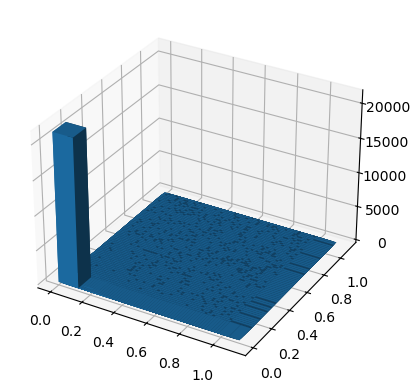

In [27]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

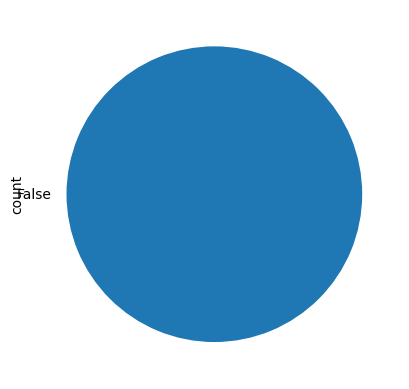

In [28]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [29]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs